In [155]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#matplotlib mac에서 한글폰트 나오게하기
import matplotlib.font_manager as fm
font_location='/Library/Fonts/NanumBarunGothic.otf'
font_name=fm.FontProperties(fname=font_location).get_name()
mpl.rc('font',family=font_name) 


#과학적 표기법 사용하지 않기
pd.options.display.float_format = '{:.2f}'.format

#생략없이 출력
pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 30000)
pd.set_option('display.width', 30000)



In [156]:
df=pd.read_csv('downloads/fb_user_pay.csv',encoding='cp949') #fb로 유입된 유저중 결제한 유저 데이터
AU=pd.read_csv('downloads/FB_AU.csv',encoding='cp949') #fb 유입 데이터 
df=df.rename({'trunc':'pay_sum'},axis='columns') #컬럼명 변경하기
del df['member_id.1']
del AU['partner']
df['pay_sum'].describe() #누적 결제 금액에 관한 기본 통계정보 확인


count      1135.00
mean     140583.08
std      412215.47
min        1200.00
25%        5900.00
50%       29900.00
75%      109000.00
max     6327500.00
Name: pay_sum, dtype: float64

In [157]:
au_cnt=AU['ua_ad'].value_counts()
au_df=pd.DataFrame({'ad':au_cnt.index,'au_cnt':au_cnt.values})
au_df #유입 유저 데이터프레임 만들기


,ad,au_cnt
0,5성선택영상-이프,3220
1,프로모션 이미지,1611
2,발키리 지급중!,1254
3,5성선택-3이프잉베자흐라,1004
4,가브리엘 버티컬,843
5,타이틀 이미지 800 1000,820
6,리리스 버티컬,724
7,우리엘 wide,621
8,ADID_리텐션5_2534_02,547
9,신규 유저 혜택 - 프레이야 영상,460


In [158]:
pay_cnt=df['ua_ad'].value_counts()
pay_df=pd.DataFrame({'ad':pay_cnt.index,'pay_cnt_all':pay_cnt.values})
pay_df #결제 유저 데이터 프레임 만들기

,ad,pay_cnt_all
0,5성선택영상-이프,97
1,프로모션 이미지,78
2,발키리 지급중!,63
3,타이틀 이미지 800 1000,50
4,5성선택-3이프잉베자흐라,34
5,신규 유저 - 메인 일러스트,34
6,ADID_리텐션5_2534_02,32
7,PROMO2 편집본 2,30
8,리리스 버티컬,30
9,5성 영웅 즉시 지급 - 단체사진,30


In [159]:
whole=pd.merge(au_df,pay_df, on='ad',how='outer') #'ad' 기준으로 full outer join
whole=whole.fillna(0) #결측치 0으로 대체 
whole['ratio']=(whole['pay_cnt_all']/whole['au_cnt'])*100 #ration column 추가 (결제유저/유입유저 *100)
whole.sort_values(by='ratio',ascending=False) #ratio 기준 내림차순 정렬


,ad,au_cnt,pay_cnt_all,ratio
280,AOS 관심사타겟 3544-영상3,1,1.00,100.00
252,이계던전,2,1.00,50.00
240,AOS UAC ADID 유사타겟3544-5,3,1.00,33.33
235,iOS D5 ADID 유사타겟 2534-3,4,1.00,25.00
228,AOS UAC ADID 유사타겟 2534-6,4,1.00,25.00
206,5성선택-잉베 - 사본,5,1.00,20.00
202,ADID_리텐션5_2534_04,5,1.00,20.00
216,프레이야169,5,1.00,20.00
120,2차 프로모 편집본,26,5.00,19.23
116,확률업소재3,27,4.00,14.81


In [160]:
whole['au_cnt'].describe()

count    290.00
mean      90.80
std      256.99
min        1.00
25%        5.00
50%       17.00
75%       66.00
max     3220.00
Name: au_cnt, dtype: float64

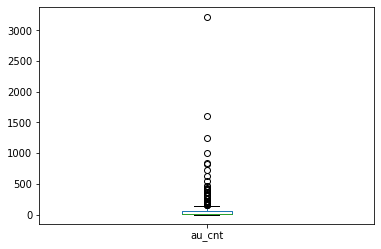

In [161]:
whole['au_cnt'].plot.box() #boxplot 그려보기;편차가 크기 때문에 평균보다는 중앙값이 의미가 있다고 판단. 중앙값 17을 기준으로 다시 나눔

In [162]:
whole[whole['au_cnt']>17].sort_values(by='ratio', ascending=False) #유입 유저가 중앙값 17 이상인 데이터만 추출 

,ad,au_cnt,pay_cnt_all,ratio
120,2차 프로모 편집본,26,5.00,19.23
116,확률업소재3,27,4.00,14.81
70,프레이 영상 800 1000,71,10.00,14.08
118,500일 이벤트 가브리엘 이미지 800 1000 - 사본,27,3.00,11.11
111,프레이 영상 1080 1920,29,3.00,10.34
94,녹턴,39,4.00,10.26
67,신규 유저 혜택 - 프레이야 영상 - 사본,75,7.00,9.33
49,프로모션 영상 편집본 1,131,12.00,9.16
36,타이틀2_1:1,174,15.00,8.62
88,신규 유저 - 메리,47,4.00,8.51


In [163]:
pay_user=df[(df['pay_sum']>29900)&(df['pay_sum']<140000)]
pay_cnt2=pay_user['ua_ad'].value_counts()
pay_df2=pd.DataFrame({'ad':pay_cnt2.index,'pay_cnt_30000':pay_cnt2.values})
pay_df2 #3만원 이상 14만원미만 결제 유저 데이터 프레임 만들기


,ad,pay_cnt_30000
0,5성선택영상-이프,38
1,프로모션 이미지,19
2,타이틀 이미지 800 1000,18
3,ADID_리텐션5_2534_02,13
4,발키리 지급중!,13
5,5성선택-3이프잉베자흐라,11
6,PROMO2 편집본 2,10
7,신규 유저 - 메인 일러스트,9
8,클라우디아 코스튬 로고 영상 800 1000,8
9,5성소환_이프,7


In [164]:
whole2=pd.merge(pay_df,pay_df2, on='ad',how='outer') #'ad' 기준으로 full outer join
whole2=whole2.fillna(0) #결측치 0으로 대체 
whole2['ratio']=(whole2['pay_cnt_30000']/whole2['pay_cnt_all'])*100 #결제유저/유입유저 *100 
#내림차순 정렬
whole2[whole2['pay_cnt_all']>3].sort_values(by='ratio', ascending=False)

,ad,pay_cnt_all,pay_cnt_30000,ratio
37,5성선택영상-프레이,9,6.00,66.67
47,신규유저 혜택 리리스,6,4.00,66.67
58,op프레이야_1:1영상,5,3.00,60.00
55,신규 유저 - 프레이야 영상,5,3.00,60.00
53,클라코스튬_4:5크롭,5,3.00,60.00
44,단체 사진,7,4.00,57.14
28,프레이 소환 영상 1920 1080,10,5.00,50.00
51,신규유저 혜택 메리,6,3.00,50.00
50,op프레이야_가로영상,6,3.00,50.00
19,ADID_리텐션5_2534_05,14,6.00,42.86


In [165]:
pay_user2=df[df['pay_sum']>140000]
pay_cnt3=pay_user2['ua_ad'].value_counts()
pay_df3=pd.DataFrame({'ad':pay_cnt3.index,'pay_cnt_140000':pay_cnt3.values})
pay_df3 #14만원 이상 결제 유저 데이터 프레임 만들기


,ad,pay_cnt_140000
0,5성선택영상-이프,18
1,타이틀 이미지 800 1000,15
2,프로모션 이미지,14
3,발키리 지급중!,13
4,리리스 버티컬,10
5,가브리엘 버티컬,8
6,신규 유저 - 메인 일러스트,7
7,PROMO2 편집본 2,7
8,5성선택-3이프잉베자흐라,7
9,ADID_리텐션5_2534_02,6


In [166]:
whole3=pd.merge(pay_df,pay_df3, on='ad',how='outer') #'ad' 기준으로 full outer join
whole3=whole3.fillna(0) #결측치 0으로 대체 
whole3['ratio']=(whole3['pay_cnt_140000']/whole3['pay_cnt_all'])*100 #결제유저/14만원 이상 결제 유저 *100컬럼추가

#내림차순 정렬
whole3[whole3['pay_cnt_all']>3].sort_values(by='ratio', ascending=False)

,ad,pay_cnt_all,pay_cnt_140000,ratio
63,확률업소재3,4,2.00,50.00
61,프레이야_1:1크롭영상,4,2.00,50.00
46,5성선택-바솔,6,3.00,50.00
31,타이틀 이미지 1200 628,10,4.00,40.00
56,5성선택-1이프바니잉베,5,2.00,40.00
38,브리트라 & 티타니아,8,3.00,37.50
8,리리스 버티컬,30,10.00,33.33
50,op프레이야_가로영상,6,2.00,33.33
33,미코토_힐데가드_영상,10,3.00,30.00
3,타이틀 이미지 800 1000,50,15.00,30.00


In [170]:
au_df #유입유저
pay_df #결제유저
pay_df2 #3만원 이상 14만원 미만 결제유저 
pay_df3 #14만원 이상 결제 유저

#유입유저수 / 결제유저수 / 3만원이상 결제유저 수 /14만원 이상 결제 유저 수 df 만들기
ALL=pd.merge(au_df,pay_df, on='ad',how='outer') 
ALL2=pd.merge(pay_df2,pay_df3, on='ad', how='outer')
ALL3=pd.merge(ALL,ALL2, on='ad',how='outer')
ALL3=ALL3.fillna(0) #결측치 0으로 대체 

ALL3

,ad,au_cnt,pay_cnt_all,pay_cnt_30000,pay_cnt_140000
0,5성선택영상-이프,3220,97.00,38.00,18.00
1,프로모션 이미지,1611,78.00,19.00,14.00
2,발키리 지급중!,1254,63.00,13.00,13.00
3,5성선택-3이프잉베자흐라,1004,34.00,11.00,7.00
4,가브리엘 버티컬,843,29.00,3.00,8.00
5,타이틀 이미지 800 1000,820,50.00,18.00,15.00
6,리리스 버티컬,724,30.00,7.00,10.00
7,우리엘 wide,621,11.00,4.00,1.00
8,ADID_리텐션5_2534_02,547,32.00,13.00,6.00
9,신규 유저 혜택 - 프레이야 영상,460,11.00,2.00,2.00


In [171]:
pay_df

,ad,pay_cnt_all
0,5성선택영상-이프,97
1,프로모션 이미지,78
2,발키리 지급중!,63
3,타이틀 이미지 800 1000,50
4,5성선택-3이프잉베자흐라,34
5,신규 유저 - 메인 일러스트,34
6,ADID_리텐션5_2534_02,32
7,PROMO2 편집본 2,30
8,리리스 버티컬,30
9,5성 영웅 즉시 지급 - 단체사진,30


In [168]:
no_pay=whole[whole['pay_cnt_all']==0.00]

In [169]:
no_pay

,ad,au_cnt,pay_cnt_all,ratio
45,iOS D5 ADID 유사타겟 2534-영상1,141,0.00,0.00
60,신규 유저 혜택 - 티타니아 영상,91,0.00,0.00
82,신규수영복3종11,53,0.00,0.00
86,리리스이레네11,47,0.00,0.00
89,신규 유저 - 브리트라 영상,44,0.00,0.00
99,이프리트_9:16영상,35,0.00,0.00
100,신규 유저 혜택 - 티타니아 이미지,35,0.00,0.00
105,라자_영상,30,0.00,0.00
106,구)자흐라소환영상,30,0.00,0.00
113,AOS UAC ADID 유사타겟 2534-영상1,29,0.00,0.00
